In this notebook, We want to investigate the precentage of Infants and under-five children mortality to answer to the following question. We're working with three datasets derived from [the United Nations](http://data.un.org/) agency. the link to each is mentioned in front, [the first dataset](https://data.un.org/Data.aspx?q=iran&d=PopDiv&f=variableID%3a12%3bcrID%3a364), [the second dataset](https://data.un.org/Data.aspx?q=iran&d=PopDiv&f=variableID%3a77%3bcrID%3a364), and [the third dataset](https://data.un.org/Data.aspx?q=iran&d=PopDiv&f=variableID%3a80%3bcrID%3a364). And also I will put them in the `datasets` directory.

the question is: **`how will the percentage of infant and under-five children mortality change over 2023-2100 in Iran?`**

It is kept the records concerning Constant mortality rates in the first dataset. Any record concerning the year 2022 is dropped from different data frames in order to can provide our arbitrary range, 2023-2100.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()
sns.set_style('white')

## Working on the first dataset

In [2]:
variant_data = pd.read_csv('datasets/Total_population,both_sexes_combined_(thousands).csv')
variant_data.head(15)

,Country or Area,Year(s),Variant,Value
0,Iran (Islamic Republic of),2100,Medium,79906.390
1,Iran (Islamic Republic of),2100,High,117786.974
2,Iran (Islamic Republic of),2100,Low,52190.509
3,Iran (Islamic Republic of),2100,Constant fertility,80061.797
4,Iran (Islamic Republic of),2100,Instant replacement,112161.037
5,Iran (Islamic Republic of),2100,Zero migration,84263.277
6,Iran (Islamic Republic of),2100,Constant mortality,64064.751
7,Iran (Islamic Republic of),2100,No change,64169.142
8,Iran (Islamic Republic of),2100,Momentum,98636.153
9,Iran (Islamic Republic of),2100,Instant replacement zero migration,117237.320


In [3]:
variant_data.shape

(1257, 4)

In [4]:
variant_data = (variant_data.rename({'Country or Area' : 'Country', 
                               'Year(s)' : 'Year'}, axis='columns')
                      .replace('\s\(.*\)', '', regex=True))
variant_data.head(15)

,Country,Year,Variant,Value
0,Iran,2100,Medium,79906.390
1,Iran,2100,High,117786.974
2,Iran,2100,Low,52190.509
3,Iran,2100,Constant fertility,80061.797
4,Iran,2100,Instant replacement,112161.037
5,Iran,2100,Zero migration,84263.277
6,Iran,2100,Constant mortality,64064.751
7,Iran,2100,No change,64169.142
8,Iran,2100,Momentum,98636.153
9,Iran,2100,Instant replacement zero migration,117237.320


In [5]:
total_mortality = variant_data[variant_data['Variant'] == 'Constant mortality'] # filter our required data
total_mortality = total_mortality.drop(1176) # delete a row related to the year 2022
total_mortality = (total_mortality.set_index(['Country', 'Variant'])
                        .rename({'Value' : 'Total Mortality'}, axis=1))
total_mortality

Year  Total Mortality
Country Variant                                  
Iran    Constant mortality  2100        64064.751
        Constant mortality  2099        64673.187
        Constant mortality  2098        65290.575
        Constant mortality  2097        65914.630
        Constant mortality  2096        66541.763
...                          ...              ...
        Constant mortality  2027        90956.102
        Constant mortality  2026        90557.992
        Constant mortality  2025        90118.757
        Constant mortality  2024        89638.417
        Constant mortality  2023        89116.509

[78 rows x 2 columns]

## Working on the second dataset

In [6]:
infant_mortality = pd.read_csv('datasets/Infant_mortality_rate,for_both_sexes_combined_(infant_deaths_per_1,000_live_births).csv')
infant_mortality.head()

,Country or Area,Year(s),Variant,Value
0,Iran (Islamic Republic of),2101,Medium,NaN
1,Iran (Islamic Republic of),2100,Medium,1.7961
2,Iran (Islamic Republic of),2099,Medium,1.8176
3,Iran (Islamic Republic of),2098,Medium,1.8405
4,Iran (Islamic Republic of),2097,Medium,1.8609


In [7]:
infant_mortality.shape

(152, 4)

In [8]:
infant_mortality = (infant_mortality.rename({'Country or Area' : 'Country', 'Year(s)' : 'Year',
                                             'Value' : 'Infant Mortality'}, axis=1)
                                    .replace('[ ]\(.*\)', '', regex=True))

infant_mortality = (infant_mortality.drop([0, 79])
                                    .set_index('Country'))

infant_mortality = infant_mortality[infant_mortality['Year'] >=2022]

In [9]:
infant_mortality.shape

(78, 3)

In [10]:
infant_mortality.head()

,Year,Variant,Infant Mortality
Country,,,
Iran,2100,Medium,1.7961
Iran,2099,Medium,1.8176
Iran,2098,Medium,1.8405
Iran,2097,Medium,1.8609
Iran,2096,Medium,1.8840


## Working on the third dataset

In [11]:
under5_mortality = pd.read_csv('datasets/Under-five_mortality,fo_both_sexes_combined_(deaths_under_age_five_per_1,000_live_births).csv')
under5_mortality.head()

,Country or Area,Year(s),Variant,Value
0,Iran (Islamic Republic of),2101,Medium,NaN
1,Iran (Islamic Republic of),2100,Medium,2.1183
2,Iran (Islamic Republic of),2099,Medium,2.1443
3,Iran (Islamic Republic of),2098,Medium,2.1719
4,Iran (Islamic Republic of),2097,Medium,2.1968


In [12]:
under5_mortality.shape

(152, 4)

In [13]:
under5_mortality = (under5_mortality.rename({'Country or Area' : 'Country', 'Year(s)' : 'Year',
                                             'Value' : 'Under five Mortality'}, axis=1)
                                    .drop([0, 79])
                                    .replace('\s\(.*\)', '', regex=True)
                                    .set_index(['Country', 'Variant']))

under5_mortality = under5_mortality[under5_mortality['Year'] >= 2022]
under5_mortality.head()

Year  Under five Mortality
Country Variant                            
Iran    Medium   2100                2.1183
        Medium   2099                2.1443
        Medium   2098                2.1719
        Medium   2097                2.1968
        Medium   2096                2.2246

In [14]:
under5_mortality.shape

(78, 2)

## Create an empty dataframe

In [15]:
df = pd.DataFrame() 
df['Total Mortality'] = total_mortality['Total Mortality'].values
df['Infant Mortality'] = infant_mortality['Infant Mortality'].values
df['Year'] = infant_mortality['Year'].values

df.head()

,Total Mortality,Infant Mortality,Year
0,64064.751,1.7961,2100
1,64673.187,1.8176,2099
2,65290.575,1.8405,2098
3,65914.630,1.8609,2097
4,66541.763,1.8840,2096


In [16]:
df.shape

(78, 3)

In [17]:
df['Under five Mortality'] = under5_mortality['Under five Mortality'].values
df

,Total Mortality,Infant Mortality,Year,Under five Mortality
0,64064.751,1.7961,2100,2.1183
1,64673.187,1.8176,2099,2.1443
2,65290.575,1.8405,2098,2.1719
3,65914.630,1.8609,2097,2.1968
4,66541.763,1.8840,2096,2.2246
...,...,...,...,...
73,90956.102,8.1543,2027,9.7438
74,90557.992,8.4219,2026,10.0614
75,90118.757,8.7617,2025,10.4609
76,89638.417,9.1190,2024,10.8804


## Calculate the mortality ratio

In [18]:
mortality_percent_pop = (df['Infant Mortality'] / df['Total Mortality']) * (100)
mortality_percent_pop.sort_values(inplace=True, ascending=False)
mortality_percent_pop

77    0.010635
76    0.010173
75    0.009722
74    0.009300
73    0.008965
        ...   
4     0.002831
3     0.002823
2     0.002819
1     0.002810
0     0.002804
Length: 78, dtype: float64

In [19]:
under5_percent_pop = (df['Under five Mortality'] / df['Total Mortality']) * (100)
under5_percent_pop.sort_values(inplace=True, ascending=False)
under5_percent_pop

77    0.012681
76    0.012138
75    0.011608
74    0.011110
73    0.010713
        ...   
4     0.003343
3     0.003333
2     0.003327
1     0.003316
0     0.003306
Length: 78, dtype: float64

## Plotting charts

<IPython.core.display.Javascript object>


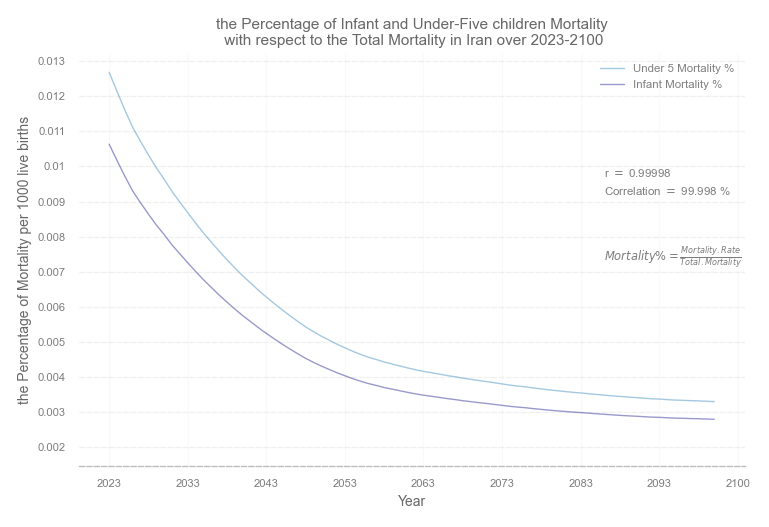

In [21]:
x_loc = np.arange(0, 78, 1)
y_loc = np.arange(0.002, 0.014, .001)

xTextLabel = np.arange(2023,2100,10)
yTextLabel = y_loc

#---------
plt.figure(figsize=(7.69,5.27))

#---------
plt.plot(x_loc, under5_percent_pop.values, linewidth=1, color='#1F77B4', alpha=.4, label='Under 5 Mortality %')
plt.plot(x_loc, mortality_percent_pop, linewidth=1, color='Navy', alpha=.4, label='Infant Mortality %')

for i in y_loc:
    plt.axhline(i, linewidth=1, linestyle='--', color='k', alpha=.04)
    
#---------
ax = plt.gca()

#---------
xTextLabel = xTextLabel.tolist()
xTextLabel.append(2100)
xlocs = ax.get_xticks().tolist()
for i in range(0,9):
    xlocs[i + 1] = xTextLabel[i]
ax.set_xticklabels(xlocs, alpha=.6)


#---------
ax.set_yticks(y_loc, yTextLabel, alpha=.6)

ylocs, ylabels = plt.yticks()
yTextLabel = ylocs.tolist()
for i in range(0, 11):
    if i == 7 or i == 9:
        ylocs[i] = round(yTextLabel[i], 3)
    else:
        ylocs[i] = yTextLabel[i]
ax.set_yticklabels(ylocs, alpha=.6)

#---------
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)

#---------
ax.set_title('the Percentage of Infant and Under-Five children Mortality\n with respect to the Total Mortality in Iran over 2023-2100',
            fontsize=11, alpha=.7)

ax.set_ylabel('the Percentage of Mortality per 1000 live births', fontsize=10, alpha=.7)
ax.set_xlabel('Year', fontsize=10, alpha=.7)

#---------
for key, value in ax.spines.items():
    if key == 'bottom':
        value.set_alpha(.3)
        value.set_linestyle('--')
        value.set_linewidth(1)
    else:
        value.set_visible(False)
        
#---------
ax.grid(visible=True, alpha=.1)

#---------
plt.tight_layout()

#---------
plt.legend(loc='upper right', frameon=False, fontsize='x-small');
plt.rcParams['legend.labelcolor'] = 'gray'

#---------
from scipy import stats
stats, pval = stats.pearsonr(mortality_percent_pop, under5_percent_pop)

#---------
ax.text(x=63.0, y=0.0092, s='Correlation $=$ {} %'.format(stats.round(5) * 100), fontsize='x-small', alpha=.6);
ax.text(x=63.0, y=0.0097, s='r $=$ {:.5f}'.format(stats), fontsize='x-small', alpha=.6);
ax.text(x=63.0, y=0.0073, s=r'$Mortality\%= \frac{Mortality.Rate}{Total.Mortality}$', fontsize='x-small', alpha=.6);

#---------
# plt.savefig('result.png')